In [1]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        lst = text
        the_set = sorted(list(set(lst))) 
        dct = {i+1: the_set[i] for i in range(len(the_set))}
        pas, res = 0, []
        for index, i in enumerate(lst):
            if pas!=0:
                pas -= 1
            else:
              added  = False
              if i in dct.values():
                for k in range(len(lst)-index+1):
                    if lst[index:index+k+1] not in dct.values()and all([i in dct.values() for i in  lst[index:index+k]]):
                        dct[len(dct)+1] = lst[index:index+k+1]
                        for m in dct:
                            if dct[m] ==  lst[index:index+k]:
                                res.append(m)
                                added = True
                        pas = k-1
                        break
              if added == False:
                for m in dct:
                   if dct[m] ==  i:
                       res.append(m)
                       if pas!=0:
                           pas -= 1
        return res, dct

    def decode(self, code: str, coding_dict: list) -> str:
        new = ''
        lst = code
        previous = None
        for i in lst:
            if i in coding_dict:
                new+= coding_dict[i]
                if previous:
                    coding_dict[len(coding_dict)+1] = previous + coding_dict[i][0]
                previous = coding_dict[i]
        return new

In [2]:
import random
import string
a = LZW()
characters = string.ascii_letters + string.digits + string.punctuation + ' '
for t in range(100,500) :
    text = ''.join(random.choice(characters) for _ in range(t))
    m = a.encode(text)
    assert text == a.decode(m[0], m[1])


0.0015673637390136719 0.0
0.02438521385192871 0.0
0.0781402587890625 0.0005109310150146484
0.3376023769378662 0.0009980201721191406
1.434513807296753 0.002028942108154297
4.78869891166687 0.0029916763305664062


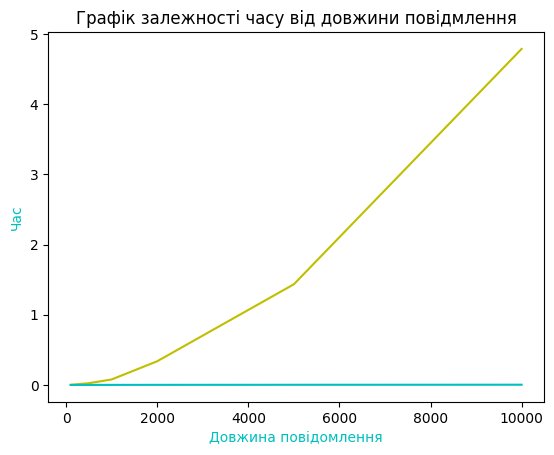

In [3]:
a = LZW()


import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
losses, losses2 = [], []
nums = [100,500, 1000, 2000, 5000, 10000]
for t in nums:
        if isinstance(t, str):
                sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        sentence = ''.join(random.choice(characters) for _ in range(t))
        start = time.time()
        m = a.encode(sentence)
        end = time.time()
        time_taken = (end - start)

        start2 = time.time()
        v = a.decode(m[0], m[1])
        end2 = time.time()
        time_taken2 = (end2 - start2)
        
        print(time_taken, time_taken2)
        assert v==sentence #тестування алгоритму

        losses.append(time_taken)
        losses2.append(time_taken2)

Y = np.array([i for i in losses])
X = np.array([i for i in nums])
P = np.array([i for i in losses2])
plt.title("Графік залежності часу від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Час', c = 'c')
plt.plot(X, Y, c = 'y') # жовтий - encode
plt.plot(X, P, c= 'c') # синій - decode
plt.show()
#Чим довше повідомлення, тим більше потрібно часу
#Алгоритм розкодування значно швидший ніж алгоритм кодування


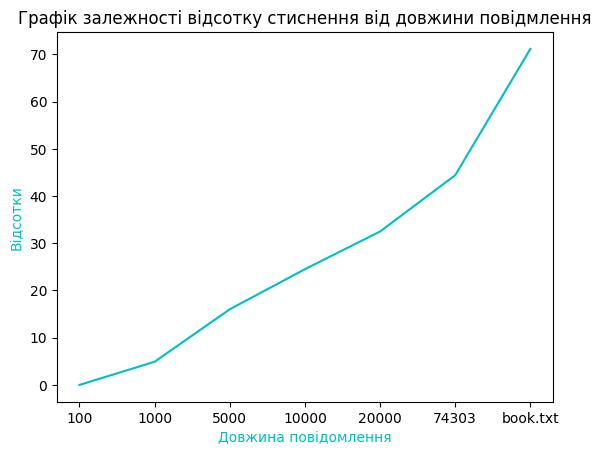

In [4]:
a = LZW()

import matplotlib.pyplot as plt
import numpy as np

import random
import string

characters = string.ascii_letters + string.digits + string.punctuation + ' '
#94604
nums = [100,1000, 5000, 10000, 20000, 74303, 'book.txt']
length = []
for t in nums:
        if isinstance(t, str):
            sentence = str([i for i in open(t, 'r', encoding='utf-8')])
        else:
            sentence = ''.join(random.choice(characters) for _ in range(t))
        m = a.encode(sentence)
        length.append(100 - (len(m[0])/len(sentence)*100))

X = np.array([i for i in nums])
P = np.array([i for i in length])
plt.title("Графік залежності відсотку стиснення від довжини повідмлення")                                                                                                                                                                                        
plt.xlabel('Довжина повідомлення', c = 'c')
plt.ylabel('Відсотки', c = 'c')
plt.plot(X, P, c= 'c')
plt.show()

#Як бачимо на графіку, чим довший текст, тим більший відсоток стиснення
# Також, алгоритм ефективніший при кодуванні книг ніж при послідовності радномних символів
# аналогічної довжини, оскільки в текстах часто повторюються слова, стиснення доходить до 70%


Як бачимо на графіку, чим довший текст, тим більший відсоток стиснення
 Також, алгоритм ефективніший при кодуванні книг ніж при послідовності радномних символів
 аналогічної довжини, оскільки в текстах часто повторюються слова, стиснення доходить до 70%